## Exploratory Analysis
***Explore data to find general insights on Bookings, Arrivals, Stays and Cancellation***

In [166]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
# Load data from local storage into a pandas dataframe
htb = pd.read_csv(r"C:/Users/HP/Documents/Azeez/Hotel Booking Analysis/hotel_bookings_clean.csv")

In [168]:
# Set all columns to show
pd.set_option('display.max_columns', None)

# Preview data
htb.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date
0,Resort Hotel,0,342,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2014-07-24
1,Resort Hotel,0,737,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2013-06-24
2,Resort Hotel,0,7,0,1,1,0,0,Bed & Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No agent,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-24
3,Resort Hotel,0,13,0,1,1,0,0,Bed & Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-18
4,Resort Hotel,0,14,0,2,2,0,0,Bed & Breakfast,GBR,Online TA,Travel Agent/Tour Operator,0,0,0,A,A,0,No Deposit,240.0,Not provided,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-06-17


In [169]:
htb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87229 entries, 0 to 87228
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87229 non-null  object 
 1   is_canceled                     87229 non-null  int64  
 2   lead_time                       87229 non-null  int64  
 3   stays_in_weekend_nights         87229 non-null  int64  
 4   stays_in_week_nights            87229 non-null  int64  
 5   adults                          87229 non-null  int64  
 6   children                        87229 non-null  int64  
 7   babies                          87229 non-null  int64  
 8   meal                            87229 non-null  object 
 9   country                         87229 non-null  object 
 10  market_segment                  87229 non-null  object 
 11  distribution_channel            87229 non-null  object 
 12  is_repeated_guest               

In [170]:
# Change columns 'reservation_status_date', 'arrival_date', 'booking_date' to datetime
htb['reservation_status_date'] = pd.to_datetime(htb['reservation_status_date'])
htb['arrival_date'] = pd.to_datetime(htb['arrival_date'])
htb['booking_date'] = pd.to_datetime(htb['booking_date'])

# Re-check datatypes
htb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87229 entries, 0 to 87228
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87229 non-null  object        
 1   is_canceled                     87229 non-null  int64         
 2   lead_time                       87229 non-null  int64         
 3   stays_in_weekend_nights         87229 non-null  int64         
 4   stays_in_week_nights            87229 non-null  int64         
 5   adults                          87229 non-null  int64         
 6   children                        87229 non-null  int64         
 7   babies                          87229 non-null  int64         
 8   meal                            87229 non-null  object        
 9   country                         87229 non-null  object        
 10  market_segment                  87229 non-null  object        
 11  di

***Q1: How many bookings were there?***

In [171]:
# Count number of bookings
print(f'Number of bookings: {htb.shape[0]:,}')

Number of bookings: 87,229


***Q2: Which hotel type (City vs Resort) has more bookings overall?***

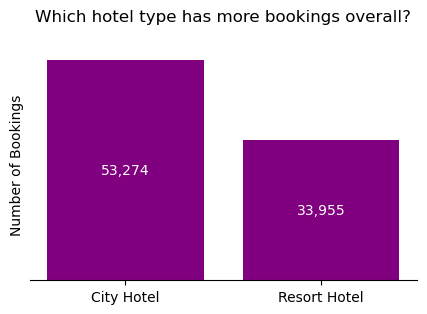

In [172]:
# Get no of bookings for each hotel type and plot on a bar chart
hotel_count = htb['hotel'].value_counts()

# Set plot size
plt.figure(figsize=(5, 3)) # Set size of plot

# Plot bar chart
bars = plt.bar(hotel_count.index, hotel_count.values, color='purple') # Plot bar chart

# Plot styling: Remove excess frame and ticks, apply descriptive title and axis labels
plt.bar_label(bars, label_type='center', color='white', fmt='{:,.0f}')
plt.title('Which hotel type has more bookings overall?', pad=20)
plt.ylabel('Number of Bookings')
plt.yticks([]) # Hide y-axis ticks
sns.despine(left=True) # Remove top and right borders

plt.show()


***Q3: What percentage of bookings were canceled vs. not canceled?***

is_canceled
0    63220
1    24009
Name: count, dtype: int64


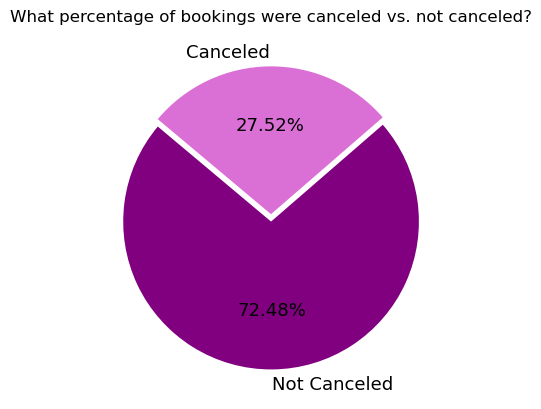

In [173]:
# Get no. of reservations canceled vs not canceled
cancellation = htb['is_canceled'].value_counts()
print(cancellation)

# Plot pie chart to show % of values - 1=Canceled, 0=Not Canceled
plt.pie(cancellation.values, labels=['Not Canceled', 'Canceled'], 
        autopct='%1.2f%%', colors=['purple', 'orchid'], startangle=140, 
        explode=(0.05,0), textprops={'size':13}
        )

# Plot title
plt.title('What percentage of bookings were canceled vs. not canceled?')

plt.show()

***Q4: What is the average lead time for bookings and how does it differ between canceled vs. non-canceled reservations***

In [174]:
# Calculate average lead time
avg_lead_time = htb['lead_time'].mean()

# Average Lead time for Canceled Bookings
avg_lead_time_canceled = htb['lead_time'][htb['is_canceled'] == 1].mean()

# Average Lead time for Non-Canceled Bookings
avg_lead_time_notcanceled = htb['lead_time'][htb['is_canceled'] == 0].mean()

print(f'Average Lead time for All Bookings: {avg_lead_time:,.0f} days')
print(f'Average Lead time for Cancelled Reservation: {avg_lead_time_canceled:,.0f} days')
print(f'Average Lead time for Non-Canceled Reservations {avg_lead_time_notcanceled:,.0f} days')

Average Lead time for All Bookings: 80 days
Average Lead time for Cancelled Reservation: 106 days
Average Lead time for Non-Canceled Reservations 70 days


***Q5: What is the average length of stay, and how does it vary between City and Resort hotels?***

*Note: For stays, we only consider Guest that actually arrived and checked-out, excluding canceled or No-Show bookings*

In [175]:
# Filter data for only bookings that checked-out
check_outs = htb[htb['reservation_status']=='Check-Out'].copy()

check_outs.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date
0,Resort Hotel,0,342,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2014-07-24
1,Resort Hotel,0,737,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2013-06-24
2,Resort Hotel,0,7,0,1,1,0,0,Bed & Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No agent,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-24
3,Resort Hotel,0,13,0,1,1,0,0,Bed & Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-18
4,Resort Hotel,0,14,0,2,2,0,0,Bed & Breakfast,GBR,Online TA,Travel Agent/Tour Operator,0,0,0,A,A,0,No Deposit,240.0,Not provided,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-06-17


In [176]:
# New column: Get total length of stay
check_outs['total_night_stays'] = check_outs['stays_in_week_nights'] + check_outs['stays_in_weekend_nights']

# Get average length of total stay days
avg_stay = check_outs['total_night_stays'].mean()

print(f'Average Length of stay: {avg_stay:,.0f} days')

Average Length of stay: 3 days


In [177]:
# Average stay days by hotel type
hotel_avg_stays = check_outs.groupby('hotel')['total_night_stays'].mean()

# Loop through series and print stay days for each hotel type
for hotel, days in hotel_avg_stays.items():
    print(f'Average Length of Stay for {hotel}: {days:.0f} days')

Average Length of Stay for City Hotel: 3 days
Average Length of Stay for Resort Hotel: 4 days


***Q6: What are the top 10 countries where guests come from?***

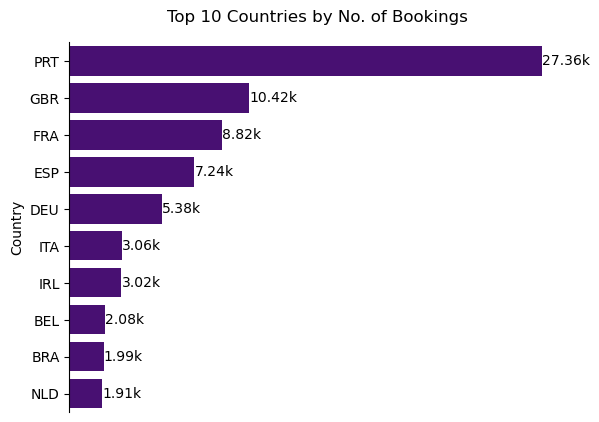

In [178]:
# Calculate total no of bookings per country and get top 10
top10_booking_country = htb['country'].value_counts().nlargest(10)

# Plot bar plot
top10 = sns.barplot(data=top10_booking_country, orient='h', color='indigo')

# Label the bars with formatted values
plt.bar_label(top10.containers[0],
               labels=[f'{val/1000:.2f}k' if val >= 1000 else f'{val:.0f}' for val in top10.containers[0].datavalues])

# Plot styling: Remove excess frame and ticks, apply descriptive title and axis labels
sns.despine(bottom=True)
plt.ylabel('Country')
plt.xlabel('')
plt.xticks([])
plt.title('Top 10 Countries by No. of Bookings', pad=15)

plt.show()

***Q7: How are arrivals distributed across days for each month and year?***

In [179]:
# Create a ordered list of month and days. Useful in time-series calculations
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

*For arrivals, we only consider Guest that actually arrived and checked-out, excluding canceled or No-Show bookings*<br>
*Therefore, we use the **Check-outs** dataframe*

In [180]:
# Create a pivot table of monthly total arrivals on days of the week basis for each year
arrival_dist = (check_outs.pivot_table(index=check_outs['arrival_date'].dt.strftime('%b'), 
                                 columns=[check_outs['arrival_date'].dt.year, 
                                          check_outs['arrival_date'].dt.strftime('%a')],
                                 values='is_canceled', aggfunc='count') # aggregation: count of records
                                 .fillna(0) # fill missing values with 0
                                 .astype(int) # force datatype integer
                                 )

# Re-arrange index 'month' and column 'days
arrival_dist = arrival_dist.reindex(index=month_order, # sort index by order of 'month_order'
                                    columns=arrival_dist.columns.set_levels(day_order, level=1)) # sort 2nd level column by order of 'day_order'
# Preview data
arrival_dist

arrival_date 2015                               2016                           \
arrival_date  Mon  Tue  Wed  Thu  Fri  Sat  Sun  Mon  Tue  Wed  Thu  Fri  Sat   
arrival_date                                                                    
Jan             0    0    0    0    0    0    0  190  243  197  217  251  284   
Feb             0    0    0    0    0    0    0  321  213  269  302  436  473   
Mar             0    0    0    0    0    0    0  414  445  474  521  426  352   
Apr             0    0    0    0    0    0    0  439  334  367  359  479  476   
May             0    0    0    0    0    0    0  594  424  323  440  283  317   
Jun             0    0    0    0    0    0    0  449  321  363  432  382  275   
Jul           189  105  155  174  212  191  134  427  330  347  335  405  499   
Aug           379  230  224  189  237  344  273  595  424  423  354  374  412   
Sep           330  326  384  305  355  323  246  472  338  294  502  446  305   
Oct           368  271  285  378  359  301  292  546  375  373  428  370  375   
Nov           292  203  198  171  216  189  150  425  339  358  324  446  336   
Dec           162  216  287  286  177  315  160  272  284  266  382  407  355   

arrival_date      2017                                
arrival_date  Sun  Mon  Tue  Wed  Thu  Fri  Sat  Sun  
arrival_date                                          
Jan           166  402  316  271  283  274  289  265  
Feb           259  389  295  257  331  373  391  362  
Mar           308  369  312  440  503  443  310  342  
Apr           300  404  301  347  373  386  486  443  
May           455  553  513  453  441  360  332  414  
Jun           382  403  365  318  504  475  364  370  
Jul           411  567  367  304  381  338  499  477  
Aug           391  411  417  399  448  334  358  404  
Sep           415    0    0    0    0    0    0    0  
Oct           558    0    0    0    0    0    0    0  
Nov           274    0    0    0    0    0    0    0  
Dec           166    0    0    0    0    0    0    0

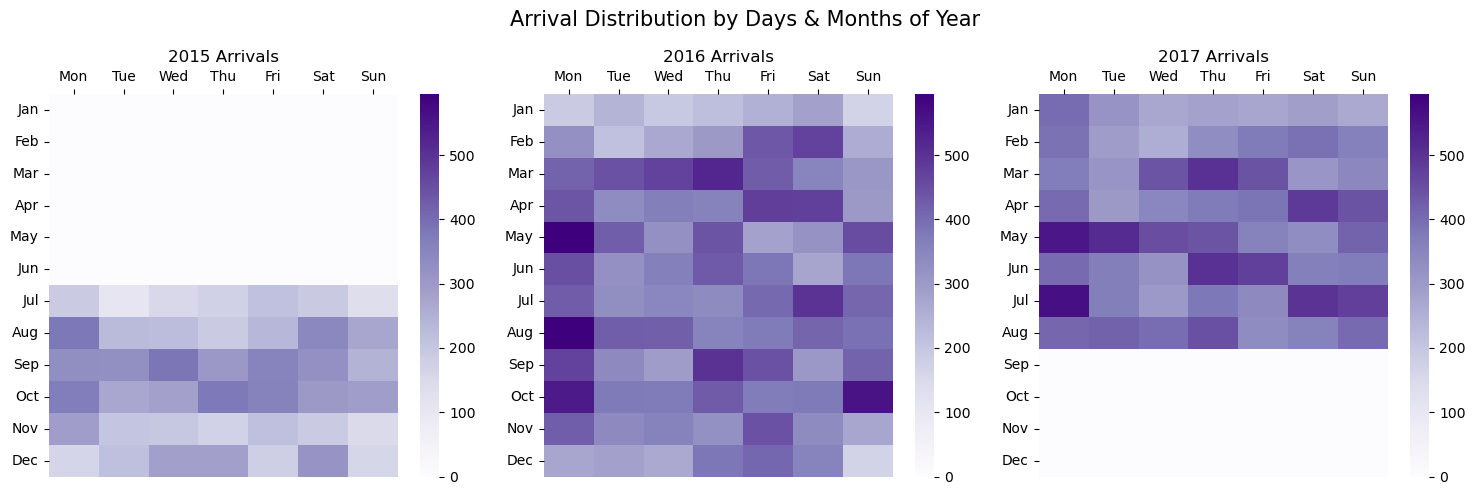

In [181]:
# Get list of years in arrivals
years = check_outs['arrival_date'].dt.year.unique()

# Create subplots dynamically and set figure size
fig, axes = plt.subplots(1, len(years), figsize=(15, 5))

# Loop through each years and plot each heatmap
for i, year in enumerate(years):
    sns.heatmap(
        arrival_dist[year], 
        cmap='Purples',
        ax=axes[i], 
        vmin=0, vmax=arrival_dist.max().max()
    )
    # Plot styling
    axes[i].set_title(f"{year} Arrivals") # label plots with respective year
    axes[i].set_xlabel("")  # Remove x-axis label
    axes[i].set_ylabel("")  # Remove y-axis label
    axes[i].tick_params(axis='y', rotation=0)   # Rotate y-axis
    axes[i].xaxis.tick_top()    # Move x-axis ticks to top of the plots

fig.suptitle('Arrival Distribution by Days & Months of Year', size=15)
fig.tight_layout()  # Auto fit and adjust plots and elements

plt.show()

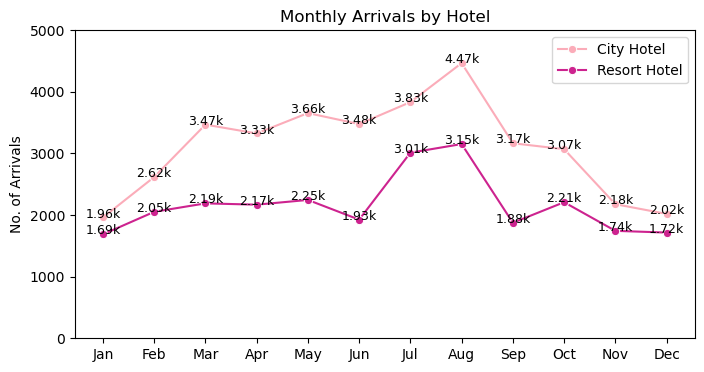

In [182]:
# Get no of arrivals per month for each hotel type
monthly_checkouts = (check_outs.groupby([check_outs['arrival_date'].dt.strftime('%b').rename('month'), 'hotel'])
                     .size()
                     .reset_index(name='arrival_count')
                     )

# Make month categorical for proper ordering in plot
monthly_checkouts['month'] = pd.Categorical(monthly_checkouts['month'], categories=month_order, ordered=True)

plt.figure(figsize=(8, 4)) # Set size of plot
# Plot a line chart
sns.lineplot(data=monthly_checkouts, x='month', y='arrival_count', hue='hotel', marker='o', palette='RdPu')

for x, y in zip(monthly_checkouts['month'], monthly_checkouts['arrival_count']):
    plt.text(x, y, s=f'{y/1000:.2f}k', size=9, ha='center')

# Plot styling
plt.title('Monthly Arrivals by Hotel')
plt.ylabel('No. of Arrivals')
plt.xlabel('')
plt.ylim(0, 5000)
plt.legend(title='')

plt.show()

***Q8: What is the proportion of reservation status (Check-out, No show, Canceled) for bookings in each hotel?***

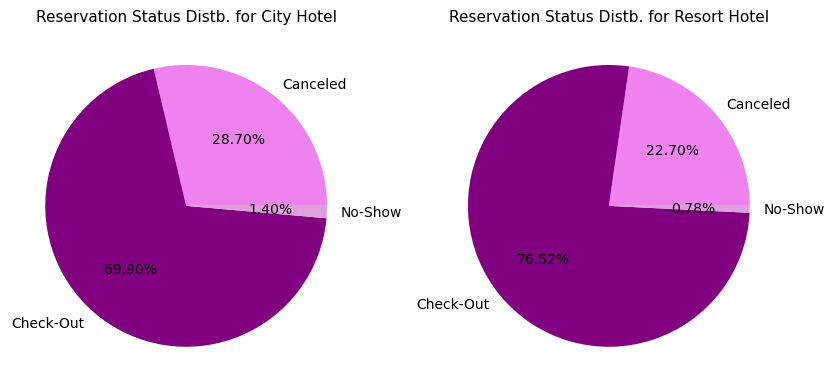

In [183]:
# Get no of bookings for hotel, reservation status
hotel_rsv = htb.groupby(['hotel', 'reservation_status']).size().reset_index(name='bookings')

hotel_list = hotel_rsv['hotel'].unique()    # get list of hotel
rsv_status = hotel_rsv['reservation_status'].unique()   # get list of reservation status

# Create subplots
fig, ax = plt.subplots(1, len(hotel_list), figsize=(10,6))

# Loop through each hotel and plot pie chart
for i, hotel in enumerate(hotel_list):
    x = hotel_rsv[hotel_rsv['hotel']==hotel]
    ax[i].pie(x=x['bookings'], autopct='%.2f%%', labels=rsv_status, colors=['violet', 'purple', 'plum'])
    ax[i].set_title(f'Reservation Status Distb. for {hotel}', size=11)

plt.show()

***Q9: What percentage of bookings had special requests?***

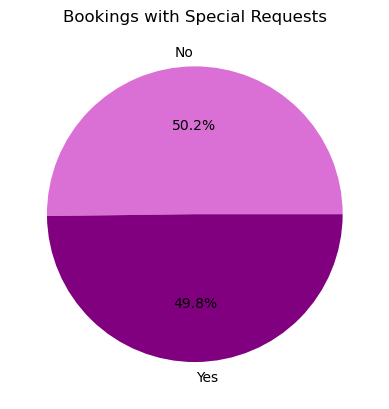

In [184]:
# Determine if bookings have request and plot a chart
(htb['total_of_special_requests']
 .apply(lambda req: 'Yes' if req >= 1 else 'No')    # if column there are one or more special request, then 'Yes', else 'No'
 .value_counts()    # get the no of bookings
 .plot(kind='pie', autopct='%1.1f%%', colors=['orchid', 'purple'])    # plot a pie chart to show percentage distribution
)

# Plot styling
plt.ylabel('')
plt.title('Bookings with Special Requests')

plt.show()

***Q10: Do special requests correlate with higher ADR or lower cancellation?***

In [185]:
# New column: descriptive boolean for if there was a special reques or not
htb['has_special_request'] = htb['total_of_special_requests'].apply(lambda req: 'Yes' if req >= 1 else 'No')

# Get 'Average Daily Rate' and 'Cancellation Rate' per request type
request_metric = htb.groupby('has_special_request').agg(
    adr=('avg_daily_rate', 'mean'), 
    cancel_rate=('is_canceled', 'mean')
).reset_index()

request_metric['cancel_rate'] = (request_metric['cancel_rate'] * 100).round(2)  # Xply cancel rate by 100 and round to 2dp
request_metric['adr'] = request_metric['adr'].round(2)  # round adr to 2dp

request_metric

,has_special_request,adr,cancel_rate
0,No,99.89,33.25
1,Yes,113.20,21.75


***Q11: Are there patterns in assigned vs. requested room types?***

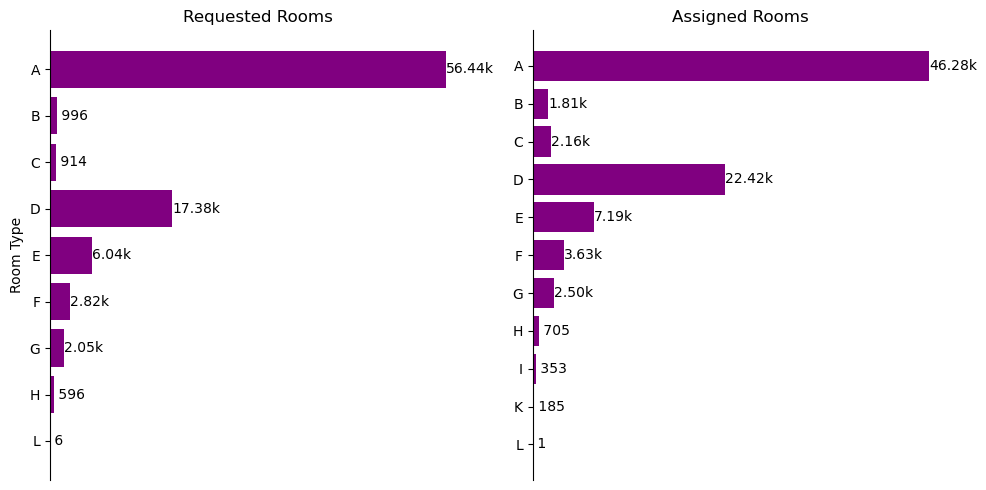

In [186]:
# Get no. of bookings per reserved room type and sort in descending order 
reserve_room = htb['reserved_room_type'].value_counts().sort_index(ascending=False)

# Get no. of bookings per assigned room type and sort in descending order
assigned_room = htb['assigned_room_type'].value_counts().sort_index(ascending=False)

# Set no. of subplots and plot size
fig, ax = plt.subplots(1,2, figsize=(10,5))

# Plot reserve room counts on first plot axis
rsv_bar = ax[0].barh(reserve_room.index, reserve_room.values, color='purple')
ax[0].bar_label(rsv_bar, labels=[f'{val/1000:.2f}k' if val >=1000 else f' {val}' for val in rsv_bar.datavalues]) # format and add bar labels
ax[0].set_title('Requested Rooms') # set plot title
ax[0].set_xticks([])    # remove x-axis ticks
ax[0].set_xlabel('')    # remove x-axis label
ax[0].set_ylabel('Room Type')    # rename y-axis label

# Plot assigned room counts on second plot axis
asg_bar = ax[1].barh(assigned_room.index, assigned_room.values, color='purple')
ax[1].bar_label(asg_bar, labels=[f'{val/1000:.2f}k' if val >=1000 else f' {val}' for val in asg_bar.datavalues]) # format and add bar labels
ax[1].set_title('Assigned Rooms') # set plot title
ax[1].set_xticks([])    # remove x-axis ticks
ax[1].set_xlabel('')    # remove x-axis label
ax[1].set_ylabel('')    # rename y-axis label

plt.tight_layout() # Auto adjust plot and elements to fix
sns.despine(bottom=True)    # Remove chart border

plt.show()

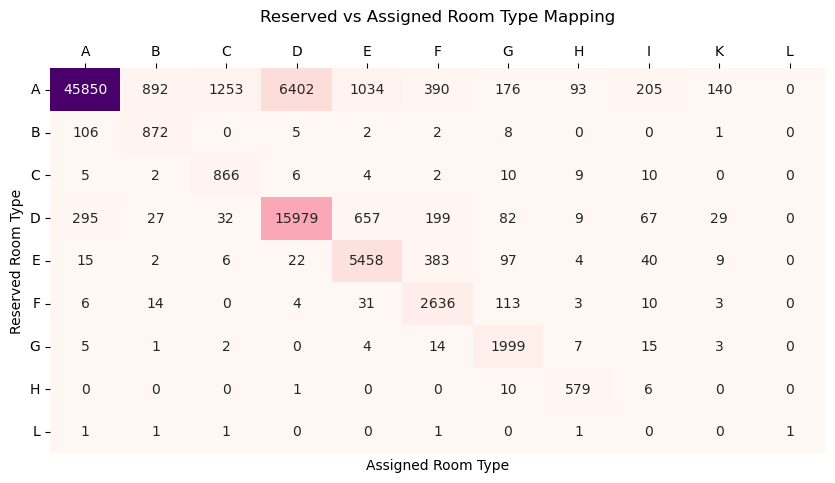

In [187]:
# Get no. of bookings for reserved rooms and assigned rooms 
room_match = (htb.groupby(['reserved_room_type', 'assigned_room_type'])
              .size()
              .reset_index(name='bookings')
              .sort_values('bookings', ascending=False)
)


# Pivot the data for heatmap
room_pivot = room_match.pivot(index='reserved_room_type', columns='assigned_room_type', values='bookings').fillna(0)

plt.figure(figsize=(10,5)) # Set plot size

# Plot heatmap
sns.heatmap(room_pivot, annot=True, fmt='.0f', cmap='RdPu', cbar=False)

# Plot styling
plt.title('Reserved vs Assigned Room Type Mapping', y=1.1)
plt.ylabel('Reserved Room Type')
plt.xlabel('Assigned Room Type')
plt.yticks(rotation=0)
plt.gca().xaxis.tick_top()    # Move x-axis ticks to top of the plots
 
plt.show()

*For reservations that got a different room type from reserved type, what is their cancelation rate?*

In [188]:
# Filter data for room type mismatch and get cancelation rate
room_mismatch = (htb[(htb['reserved_room_type']) != htb['assigned_room_type']]
                 ['is_canceled'].mean()
                 *100
                 )

print(f'Cancellation rate for bookings that didn\'t get reserved room type: {room_mismatch:.2f}%')

Cancellation rate for bookings that didn't get reserved room type: 4.74%


***Q12: Are stays during weekends or weekdays longer in Resort hotels compared to City hotels?***

*Note: For stays, we only consider Guest that actually arrived and checked-out, excluding canceled or No-Show bookings*<br>
*Therefore, we use the **Check-outs** dataframe*

In [189]:
# Get average stay length during week days and weekends for each hotel type
stay_avg = (check_outs.groupby('hotel')
            [['stays_in_weekend_nights', 'stays_in_week_nights']].mean()
            .rename(columns={'stays_in_weekend_nights': 'avg_weekend_nights', # rename columns for better readability
                             'stays_in_week_nights': 'avg_week_nights'})
            
            .round(2)   # round to 2dp
            .reset_index()) 

stay_avg

,hotel,avg_weekend_nights,avg_week_nights
0,City Hotel,0.83,2.15
1,Resort Hotel,1.16,3.04


***Q13: What proportion of hotel bookings come from repeat guests, and how do their cancellation rates compare?***

In [190]:
# Get no. of bookings with special request
(htb['is_repeated_guest']
 .apply(lambda req: 'Yes' if req == 1 else 'No') # if 1 then 'Yes', else 'No'
 .value_counts()
)

is_repeated_guest
No     83866
Yes     3363
Name: count, dtype: int64

In [ ]:
# Get cancellation rate by is_repeated_guest
(htb
 .groupby('is_repeated_guest')['is_canceled']
 .mean()    # get % rate
 .mul(100)  # Xply by 100
 .round(2)  # round to 2dp
 .rename(index={0: 'No', 1: 'Yes'}) # rename values for readability
 .reset_index(name='cancel_rate')   # reset index and name value column
 )

,is_repeated_guest,cancel_rate
0,No,28.32
1,Yes,7.73
